In [1]:
import pandas as pd
from prepare_hud_aggregate import get_hud_macro_data
from wrangle_HUDpro_amr_data import get_sanant_amr_data

In [2]:
hud = get_hud_macro_data()

In [3]:
amr = get_sanant_amr_data()

/Users/aaron/codeup-data-science/project_repo/a_moore/wrangle_HUDpro_amr_data.py:39: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['AMR']= df['AMR'].str.replace('$','').str.replace(',','')


In [4]:
# checking head
hud.head()

,fmr
date,
2016-10,964
2016-11,964
2016-12,964
2017-01,964
2017-02,964


In [5]:
# check amr head
amr.head()

,AMR
2017-01-01,1019
2017-02-01,1014
2017-03-01,1040
2017-04-01,1044
2017-05-01,1012


### Merging the data sets

In [6]:
pd.merge(left=hud, right=amr, how='outer', right_index=True, left_index=True)

,fmr,AMR
2017-01-01 00:00:00,NaN,1019
2017-02-01 00:00:00,NaN,1014
2017-03-01 00:00:00,NaN,1040
2017-04-01 00:00:00,NaN,1044
2017-05-01 00:00:00,NaN,1012
...,...,...
2022-06,1165.0,NaN
2022-07,1165.0,NaN
2022-08,1165.0,NaN
2022-09,1165.0,NaN


#### Notes
* I think the string is not working becasue of the date part, I will try to convert the index of the hud to a datetime


In [7]:
# converting the hud index datetime
hud.index = pd.to_datetime(hud.index)

In [8]:
# I belioeve the merge has nulls because the dates didnt have any information in thos sections
merged = pd.merge(left=hud, right=amr, how='outer', right_index=True, left_index=True)

In [9]:
# hus stops in october of 2022
hud.tail()

,fmr
date,
2022-06-01,1165
2022-07-01,1165
2022-08-01,1165
2022-09-01,1165
2022-10-01,1282


In [10]:
# filling in witht he correct number
merged['fmr'].fillna(1286, inplace=True)

In [11]:
# checking
merged

,fmr,AMR
2016-10-01,964.0,NaN
2016-11-01,964.0,NaN
2016-12-01,964.0,NaN
2017-01-01,964.0,1019
2017-02-01,964.0,1014
...,...,...
2022-11-01,1286.0,1495
2022-12-01,1286.0,1502
2023-01-01,1286.0,1502
2023-02-01,1286.0,1500


In [12]:
# looks good, we will now dorp the other nulls before that time period

In [13]:
# make sure htese are the only nulls
merged.isna().sum()

fmr    0
AMR    3
dtype: int64

In [14]:
# dropping the null values that are not necessary
merged.dropna(inplace=True)

In [15]:
# changed amr to float
merged['AMR'] = merged['AMR'].astype(float)

In [16]:
# creating the difference 
merged['diff'] =  merged['AMR'] - merged['fmr']

In [17]:
# changing name for accureacy (its the median not the average)
merged = merged.rename({'AMR': 'mmr'}, axis=1)

In [20]:
# Creating a function for it 
def wrangle_data():
    '''
    Arguments: none
    Actions: gets both data sets, changes the fmr index to datetime, merges bothe data sets, imputes missing fmr data with last value, drops the mmr data, adds column with the difference between them
    Returns: merged data frame ready for exploration
    Modules:
        import pandas as pd
        from prepare_hud_aggregate import get_hud_macro_data
        from wrangle_HUDpro_amr_data import get_sanant_amr_data
    Notes: csv's required for hud and sanantonio market rent data must be in the same folder as this function for it to work 
    '''
    hud = get_hud_macro_data()
    amr = get_sanant_amr_data()
    
    # converting the hud index datetime
    hud.index = pd.to_datetime(hud.index)


    # creating merged df
    merged = pd.merge(left=hud, right=amr, how='outer', right_index=True, left_index=True)
    
    # filling in witht he correct number
    merged['fmr'].fillna(1286, inplace=True)
    
    # dropping the null values that are not necessary
    merged.dropna(inplace=True)
    
    # changed amr to float
    merged['AMR'] = merged['AMR'].astype(float)
    
    # creating the difference 
    merged['diff'] =  merged['AMR'] - merged['fmr']
    
    # changing name for accureacy (its the median not the average)
    merged = merged.rename({'AMR': 'mmr'}, axis=1)
    
    # creating the train
    train = merged[merged.index <= '2022-02-01']
    
    # creating the test 
    test =  merged[merged.index > '2022-02-01']
    
    # return the merged df
    return merged, train, test

In [21]:
df, train, test = wrangle_data()

/Users/aaron/codeup-data-science/project_repo/a_moore/wrangle_HUDpro_amr_data.py:39: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['AMR']= df['AMR'].str.replace('$','').str.replace(',','')


In [ ]:
train

In [ ]:
test

In [ ]:
test =  df[df.index > '2022-02-01']

In [ ]:
train = df[df.index <= '2022-02-01']

In [ ]:
from wrangle import wrangle_data

In [22]:
df, train, test = wrangle_data()

/Users/aaron/codeup-data-science/project_repo/a_moore/wrangle_HUDpro_amr_data.py:39: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['AMR']= df['AMR'].str.replace('$','').str.replace(',','')


In [ ]:
df

In [ ]:
train

In [ ]:
test

In [33]:
#FMR
(df['fmr'][-1] - df['fmr'][0]) / df['fmr'][0]

0.33402489626556015

In [32]:
#MMR
(df['mmr'][-1] - df['mmr'][0]) / df['mmr'][0]

0.47203140333660454

In [78]:
df['fmr_perc_change'] = ((df['fmr'] - df['fmr'].shift(1) )/df['fmr'].shift(1))*100

df['diff_perc_change'] = ((df['diff'] - df['diff'].shift(1))/df['diff'].shift(1))*100

df['mmr_last_month'] = df['mmr'].shift(1)

df['mmr_perc_change'] = ((df['mmr'] - df['mmr_last_month']) / df['mmr'].shift(1) )* 100

<AxesSubplot:>

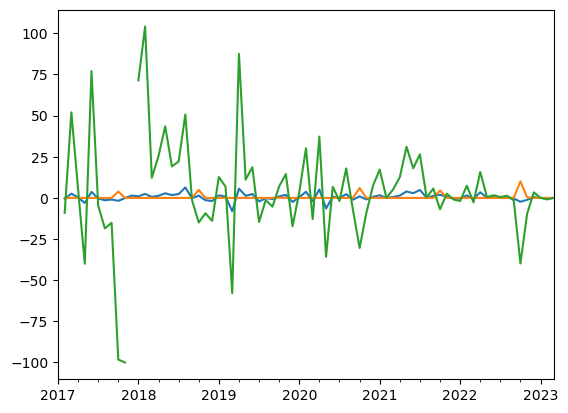

In [84]:
df['mmr_perc_change'].plot()
df['fmr_perc_change'].plot()
df['diff_perc_change'].plot()